# Úkol č. 2 - regrese

* Termíny jsou uvedeny na [courses.fit.cvut.cz](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s regresní úlohou, s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí délky dožití v různých zemích a letech.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:

* Year - Rok
* Status - Status rozvinuté nebo rozvojové země
* Life expectancy - Délka dožití v letech - **cílová proměnná, kterou budete predikovat**
* Adult Mortality - Úmrtnost dospělých bez ohledu na pohlaví (pravděpodobnost, že osoby, které dosáhly věku 15 let, zemřou před dosažením věku 60 let (uvedeno na 1 000 osob)).
* infant deaths - počet zemřelých kojenců na 1000 obyvatel
* Alcohol - Alkohol, zaznamenaná spotřeba na obyvatele (15+) (v litrech čistého alkoholu)
* percentage expenditure - Výdaje na zdravotnictví v procentech hrubého domácího produktu na obyvatele (%)
* Hepatitis B - pokrytí očkováním proti hepatitidě B (HepB) u dětí ve věku 1 roku (%)
* Measles - Spalničky - počet hlášených případů na 1000 obyvatel
* BMI - průměrný index tělesné hmotnosti celé populace
* under-five deaths - počet úmrtí dětí do pěti let na 1000 obyvatel
* Polio - proočkovanost proti dětské obrně (Pol3) u dětí ve věku 1 roku (%)
* Total expenditure - Výdaje vládních institucí na zdravotnictví jako procento celkových vládních výdajů (%)
* Diphtheria - pokrytí očkováním proti záškrtu, tetanu a černému kašli (DTP3) u jednoletých dětí (%)
* HIV/AIDS - počet úmrtí na 1 000 živě narozených dětí na HIV/AIDS (0-4 roky)
* GDP - hrubý domácí produkt na obyvatele (v USD)
* Population - počet obyvatel země
* thinness 1-19 years - podíl dětí ve věku 10-19 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* thinness 5-9 years - podíl dětí ve věku 5-9 let s indexem tělesné hmotnosti (BMI) menším než 2 směrodatné odchylky pod mediánem (%)
* Income composition of resources - Index lidského rozvoje z hlediska příjmového složení zdrojů (index v rozmezí 0 až 1)
* Schooling - počet let školní docházky (roky)


## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném regresním modelu.
    * Nějakým způsobem se vypořádejte s chybějícími hodnotami. _Pozor na metodické chyby!_
    * Můžete využívat i vizualizace. Vše stručně ale náležitě komentujte.
<br /><br />
  * Vytvořte **vlastní implementaci náhodného lesa**. Použijte k tomu níže předpřipravenou kostru.
  
  * Na připravená data postupně aplikujte Vaši předchozí implementaci modelu náhodného lesa, dále jeden z modelů **lineární regrese** nebo **hřebenové regrese**, a alespoň jeden další model podle Vašeho uvážení, přičemž pro každý z těchto modelů přiměřeně:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Experimentujte s normalizací (standardizace/min-max), pokud pro daný model očekáváte její příznivý vliv.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty (vzhledem k RMSE).
    * Pro model s nejlepšími hodnotami hyperparametrů určete jeho chybu pomocí RMSE a MAE. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.
<br /><br />
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model a odhadněte, jakou chybu (RMSE) můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tato data. Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte s využitím tří sloupců: **Country**, **Year** a **Life expectancy**. Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

  * Ukázka prvních řádků souboru `results.csv`:
  
```
Country,Year,Life expectancy
Peru,2012,71.4
Peru,2013,72.6
...
```


## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.

## **Zajistíme vše potřebné...**

In [35]:
import random
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

rd_seed = 333 # konstanta pro random operace
from scipy import optimize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import ParameterGrid
from sklearn.linear_model import Ridge
# from sklearn.linear_model import LinearRegression
# from sklearn.linear_model import Lasso
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# for ignoring all warnings
import warnings
warnings.filterwarnings('ignore')

In [36]:
# Načtení dat z .csv souborů
data = pd.read_csv("data.csv")
evaluation = pd.read_csv("evaluation.csv")

In [37]:
# Základní přehled
display(data.head())
display(data.info())
print("\nNumber of missing items in each column...")
display(data.isnull().sum(axis=0))
print("\nNumber of unique values...")
display(data.nunique())

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2718 non-null   object 
 1   Year                             2718 non-null   int64  
 2   Status                           2718 non-null   object 
 3   Life expectancy                  2718 non-null   float64
 4   Adult Mortality                  2718 non-null   float64
 5   infant deaths                    2718 non-null   int64  
 6   Alcohol                          2564 non-null   float64
 7   percentage expenditure           2718 non-null   float64
 8   Hepatitis B                      2188 non-null   float64
 9   Measles                          2718 non-null   int64  
 10  BMI                              2692 non-null   float64
 11  under-five deaths                2718 non-null   int64  
 12  Polio               

None


Number of missing items in each column...


Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            154
percentage expenditure               0
Hepatitis B                        530
Measles                              0
BMI                                 26
under-five deaths                    0
Polio                               18
Total expenditure                  189
Diphtheria                          18
HIV/AIDS                             0
GDP                                401
Population                         602
thinness  1-19 years                26
thinness 5-9 years                  26
Income composition of resources    142
Schooling                          142
dtype: int64


Number of unique values...


Country                             183
Year                                 16
Status                                2
Life expectancy                     359
Adult Mortality                     423
infant deaths                       195
Alcohol                            1055
percentage expenditure             2185
Hepatitis B                          87
Measles                             909
BMI                                 600
under-five deaths                   239
Polio                                73
Total expenditure                   792
Diphtheria                           81
HIV/AIDS                            197
GDP                                2317
Population                         2110
thinness  1-19 years                194
thinness 5-9 years                  200
Income composition of resources     613
Schooling                           173
dtype: int64

## Příprava dat

* Dále budeme **současně** upravovat dva datasety, abychom na ně mohli použít naše modely

In [38]:
# Vybíráme příznaky typu "object"
object_columns = data.select_dtypes(include=["object"])
print(f'Object columns: {object_columns.columns}')

Object columns: Index(['Country', 'Status'], dtype='object')


* Příznak "Status" je **ordinílní**, dá se ho seřadit podle vývoje země

In [39]:
status_unique = data.Status.unique()
print(status_unique)

['Developing' 'Developed']


* Konverze příznaku "Status" na categoricky typ

In [40]:
status_category = pd.api.types.CategoricalDtype(categories=status_unique, ordered=True)

data.Status = data.Status.astype(status_category)
evaluation.Status = evaluation.Status.astype(status_category)
data.Status.unique()

['Developing', 'Developed']
Categories (2, object): ['Developing' < 'Developed']

* Převedeme příznak "Status" do číselné podoby

In [41]:
data["Status"] = data["Status"].map({"Developing" : 0, "Developed" : 1})
evaluation["Status"] = evaluation["Status"].map({"Developing" : 0, "Developed" : 1})

data["Status"].unique()

[0, 1]
Categories (2, int64): [0 < 1]

* Předpokládáme, ze kombinace příznaků "Country" a "Year" je unikálním identifikátorem v datasetu `data`
* Musíme to ale ovšřit 

In [42]:
attribute1 = 'Country'
attribute2 = 'Year'

# Testujeme unikátnost každé dvojice příznaků "Country" a "Year"
is_unique_combination = data.groupby([attribute1, attribute2]).size().max() == 1

if(is_unique_combination):
    print(f'Kombinace příznaků "{attribute1}" a "{attribute2}" je unikálním identifikátorem v datasetu "data"')
else:
    print(f'Kombinace příznaků "{attribute1}" a "{attribute2}" není unikálním identifikátorem v datasetu "data"')

Kombinace příznaků "Country" a "Year" je unikálním identifikátorem v datasetu "data"


* Je zřejmé, že naše předpověď nebude záviset ani na hodnotě atributu "Country", ani na hodnotě atributu "Year"
* Tyto atributy tedy můžeme odstranit z datasetu "data"
* V případě datasetu "evaluation" uložíme do jednotlivých proměnných hodnoty atributů "Country" a "Year" , abychom ve finálním souboru s předpovědí ke konkrétní hodnotě mohli přiřadit konkrétní zemi a rok

In [43]:
evaluation_country = evaluation["Country"]
evaluation_year = evaluation["Year"]

data = data.drop(columns=["Country", "Year"])
evaluation = evaluation.drop(columns=["Country", "Year"])

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718 entries, 0 to 2717
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Status                           2718 non-null   category
 1   Life expectancy                  2718 non-null   float64 
 2   Adult Mortality                  2718 non-null   float64 
 3   infant deaths                    2718 non-null   int64   
 4   Alcohol                          2564 non-null   float64 
 5   percentage expenditure           2718 non-null   float64 
 6   Hepatitis B                      2188 non-null   float64 
 7   Measles                          2718 non-null   int64   
 8   BMI                              2692 non-null   float64 
 9   under-five deaths                2718 non-null   int64   
 10  Polio                            2700 non-null   float64 
 11  Total expenditure                2529 non-null   float64 
 12  Diphth

* Vidíme, že některé příznaky obsahují chybějící hodnoty 
* S těmi se vypořádáme tím, že je nahradíme průměrem daného příznaku

In [45]:
data.isnull().sum(axis=0)

Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            154
percentage expenditure               0
Hepatitis B                        530
Measles                              0
BMI                                 26
under-five deaths                    0
Polio                               18
Total expenditure                  189
Diphtheria                          18
HIV/AIDS                             0
GDP                                401
Population                         602
thinness  1-19 years                26
thinness 5-9 years                  26
Income composition of resources    142
Schooling                          142
dtype: int64

In [46]:
# Zaplnění chybějících hodnot průměrem
columns_with_missing_values = data.columns[data.isnull().any()].tolist()
for column in columns_with_missing_values:
    data[column] = data[column].fillna(data[column].mean())

columns_with_missing_values = evaluation.columns[evaluation.isnull().any()].tolist()
for column in columns_with_missing_values:
    evaluation[column] = evaluation[column].fillna(evaluation[column].mean())

In [47]:
data.isnull().sum(axis=0)

Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64


Oddělíme vysvětlovanou proměnnou a rozdělíme náš dataset na trénovací, validační a testovací množinu.

In [48]:
Xdata = data.drop(columns="Life expectancy")
ydata = data["Life expectancy"]

In [49]:
Xtrain, Xtest, ytrain, ytest = train_test_split(Xdata, ydata, test_size=0.4, random_state=rd_seed)

# ridge_Xtrain, ridge_Xtest, ridge_ytrain, ridge_ytest = train_test_split(Xdata.drop(columns=["infant deaths", "GDP", "thinness 5-9 years", "Population"]), ydata, test_size=0.4, random_state=rd_seed)

In [50]:
display(Xtrain.shape)
display(ytrain.shape)
display(Xtest.shape)
display(ytest.shape)

(1630, 19)

(1630,)

(1088, 19)

(1088,)

In [51]:
Xval, Xtest, yval, ytest = train_test_split(Xtest, ytest, test_size=0.5, random_state=rd_seed)

# ridge_Xval, ridge_Xtest, ridge_yval, ridge_ytest = train_test_split(ridge_Xtest, ridge_ytest, test_size=0.5, random_state=rd_seed)

In [52]:
display(Xval.shape)
display(yval.shape)
display(Xtest.shape)
display(ytest.shape)

(544, 19)

(544,)

(544, 19)

(544,)

Protože budeme zkoušet normalizaci dat u každého modelu, můžeme tedy připravit normalizovaná data.

In [53]:
# Standardizace
scaler = StandardScaler().fit(Xtrain)

Xtrain_standard_scaled = scaler.transform(Xtrain)
Xval_standard_scaled = scaler.transform(Xval)
Xtest_standard_scaled = scaler.transform(Xtest)

evaluation_standard_scaled = scaler.transform(evaluation)

In [54]:
# MinMax normalizace
scaler = MinMaxScaler().fit(Xtrain)
Xtrain_MinMax_scaled = scaler.transform(Xtrain)
Xval_MinMax_scaled = scaler.transform(Xval)
Xtest_MinMax_scaled = scaler.transform(Xtest)

evaluation_MinMax_scaled = scaler.transform(evaluation)

In [55]:
# Pro porovnání
RMSE_dict = {}

## Random Forest
* Výhody tohoto modelu
    * Ochrana před přetrénováním: Nahodný les je obecně odolný vůči přetrénování díky principu agregace
    * Efektivnost: Nahodný les může být efektivní pro velké množství dat s mnoha příznaky
    * Schopnost zacházet s heterogenními daty: Nahodný les se často osvědčuje v situacích, kdy data obsahují smíšené typy proměnných (kategorické i numerické) a různé škály"

Implementujeme vlastní třídu `CustomRandomForest`

In [56]:
# Předpřipravená kostra modelu náhodného lesa
class CustomRandomForest:
    """
    Třída Vašeho modelu
    Bude se jednat o model náhodného lesa, kde podmodely tvoří rozhodovací stromy pro regresi.
    Pro podmodely můžete použít implementaci DecisionTreeRegressor ze sklearn.
    """
    def __init__(self, n_estimators, max_samples, max_depth, **kwargs):
        """
        Konstruktor modelu
        Základní hyperparametery:
            n_estimators - počet podmodelů - rozhodovacích stromů.
            max_samples - absolutní počet bodů (tj. číslo mezi 1 a velikostí trénovací množiny), 
                          které budou pro každý podmodel rozhodovacího stromu náhodně vybrány z trénovací množiny (bootstrap) a použity k jeho trénování.
            max_depth - maximální hloubka každého z podmodelů rozhodovacího stromu.
            kwargs - (volitelně) případné další hyperparametry, které pošlete do podmodelů rozhodovacího stromu
        """
        self.n_estimators = n_estimators
        self.max_samples = max_samples
        self.max_depth = max_depth
        self.kwargs = kwargs
        self.models = []
        
    def fit(self, X, y):
        """
        Natrénování modelu. Trénovací data jsou v argumentech X a y.
        Pro trénování podmodelů používejte bootstraping a velikost samplovaného vzorku vezměte z hyperparametru max_samples_fraction
        """
        for _ in range(self.n_estimators):
            # Výběr náhodného vzorku pro trénování
            r_seed = random.randint(self.n_estimators, (self.n_estimators * 10) + 10)
            X_sampled = X.sample(n=self.max_samples, random_state=r_seed)
            y_sampled = y.sample(n=self.max_samples, random_state=r_seed)

            # Vytvoření a trénování rozhodovacího stromu
            model = DecisionTreeRegressor(max_depth=self.max_depth, **self.kwargs)
            model.fit(X_sampled, y_sampled)

            # Přidání natrénovaného modelu do seznamu
            self.models.append(model)
        
    def predict(self, X):
        """
        Predikce y v zadaných bodech X
        """
        ypredicted = np.zeros((X.shape[0], self.n_estimators))
        
        # Predikce každým pod-modelem
        for i, model in enumerate(self.models):
            ypredicted[:, i] = model.predict(X)

        # Průměrná predikce ze všech pod-modelů
        y_mean = np.mean(ypredicted, axis=1)

        return y_mean


* Budeme ladit více hyperparametrů
* Pomocí funkce **ParameterGrid()** dostaneme všechny možné kombinace těchto hyperparametrů
* Pak každou kombinaci vyzkoušíme na validační množině, abychom našli tu "nejlepší"
* Použijeme nejlepší kombinaci hyperparametrů, nacvičíme model a najdeme RMSE na validační množině

We found the best params {'normalization': None, 'n_estimators': 35, 'max_samples': 1300, 'max_features': None, 'max_depth': 7} with validation RMSE 2.209714.


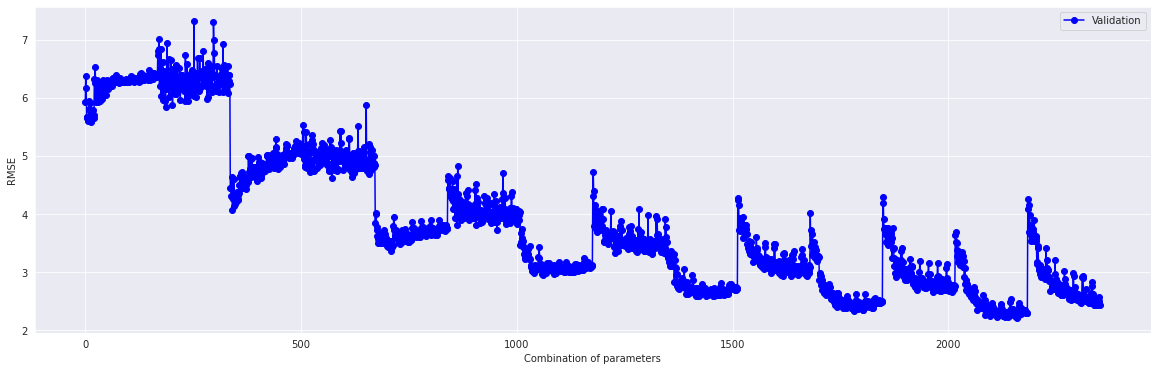

In [57]:
# Hyperparametry
param_grid = {
    'n_estimators' : range(5, 40, 5),
    'max_samples' : range(100, 1600, 200),
    'max_depth' : range(1, 8),
    'max_features' : [None, "sqrt"],
    'normalization' : [None, 'Standard', 'MinMax']
}

# Všechny možné kombinace
param_comb = ParameterGrid(param_grid)

# Ladění
val_metric = []
for params in param_comb:
    rf = CustomRandomForest(n_estimators=params['n_estimators'],
                            max_samples=params['max_samples'],
                            max_depth=params['max_depth'],
                            max_features=params['max_features'])
    if params['normalization'] is None:
        rf.fit(Xtrain, ytrain)
        prediction = rf.predict(Xval)
    elif params['normalization'] == 'Standard':
        scaler = StandardScaler()                                                                                # Musíme ponechat normalizovaná data
        Xtrain_scaled = pd.DataFrame(scaler.fit_transform(Xtrain), index=Xtrain.index, columns=Xtrain.columns)   # jako pd.DataFrame pro umožnění použití
        Xval_scaled = pd.DataFrame(scaler.transform(Xval), index=Xval.index, columns=Xval.columns)               # metody sample()
        rf.fit(Xtrain_scaled, ytrain)
        prediction = rf.predict(Xval_scaled)
    else:
        scaler = MinMaxScaler()                                                                                  # Musíme ponechat normalizovaná data
        Xtrain_scaled = pd.DataFrame(scaler.fit_transform(Xtrain), index=Xtrain.index, columns=Xtrain.columns)   # jako pd.DataFrame pro umožnění použití
        Xval_scaled = pd.DataFrame(scaler.transform(Xval), index=Xval.index, columns=Xval.columns)               # metody sample()
        rf.fit(Xtrain_scaled, ytrain)
        prediction = rf.predict(Xval_scaled)
    
    val_metric.append(metrics.mean_squared_error(yval, prediction, squared=False))

# Vizualizace výsledků
best_params = param_comb[np.argmin(val_metric)]
RMSE_dict['Random Forest RMSE'] = min(val_metric)
print(f"We found the best params {best_params} with validation RMSE {min(val_metric):.6f}.")
plt.figure(figsize=(20,6))
plt.plot(val_metric,'ob-')
plt.xlabel('Combination of parameters')
plt.ylabel('RMSE')
plt.legend(['Validation'])

* RMSE (valodační data): 2.210 
    * Vzhledem k povaze cílové proměnné (délky dožití) je výsledek 2.210 relativně nízký, což je pozitivní. To může znamenat, že model dobře zachycuje vztahy mezi příznaky a délkou dožití a má schopnost přesně predikovat tuto hodnotu.

## Ridge regression
* Obecné výhody tohoto modelu
    * Multikolinearita: Ridge regrese je užitečná, když jsou příznaky ve vašich datech vysokým způsobem korelované (multikolinearita)
    * Ochrana před přetrénováním: Ridge regrese přidává regularizační člen do objektivní funkce, což pomáhá omezit přetrénování modelu
    * Interpretovatelnost: Lineární modely jsou obecně snáze interpretovatelné než složitější modely, jako je Random Forest

Ověříme, zda náš dataset obsahuje silně korelované příznaky. Použijeme pro to korelační matici.

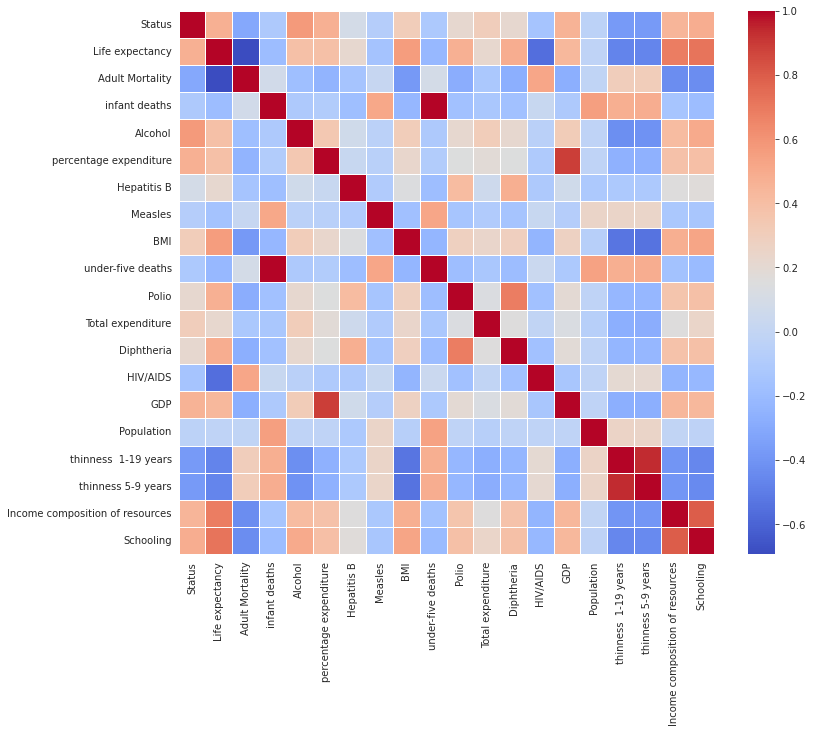

In [58]:
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()

# Vytvoření teplomapu korelační matice
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.show()

In [59]:
# Vytvořte korelační matici
correlation_matrix = data.corr()

high_correlation_pairs = []
low_correlation_with_Y = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])
            high_correlation_pairs.append(pair)

for i in range(len(correlation_matrix.columns)):
    if abs(correlation_matrix.iloc[1, i]) < 0.1:
        pair = (correlation_matrix.columns[1], correlation_matrix.columns[i])
        low_correlation_with_Y.append(pair)


print("Dvojice s korelací > 0.8:\n")
for _, pair in enumerate(high_correlation_pairs):
    print(pair)

print("\n\nPříznaky s nízkou korelací s vysvětlovanou proměnnou (< 0.1):\n")
for _, pair in enumerate(low_correlation_with_Y):
    print(pair[1])

Dvojice s korelací > 0.8:

('infant deaths', 'under-five deaths')
('percentage expenditure', 'GDP')
('thinness  1-19 years', 'thinness 5-9 years')


Příznaky s nízkou korelací s vysvětlovanou proměnnou (< 0.1):

Population


Je vidět, že některé příznaky jsou silně korelované mezi sebou, proto jenom **PŘEDPOKLÁDÁME**, že volba Ridge regrese bude rozumná.

* Budeme hledat optimální $\lambda$ pro Ridge regresi
* Také vyzkoušíme Min-Max normalizaci a standardizaci
* Použijeme nejlepší kombinaci hyperparametrů, nacvičíme model a najdeme RMSE na validační množině

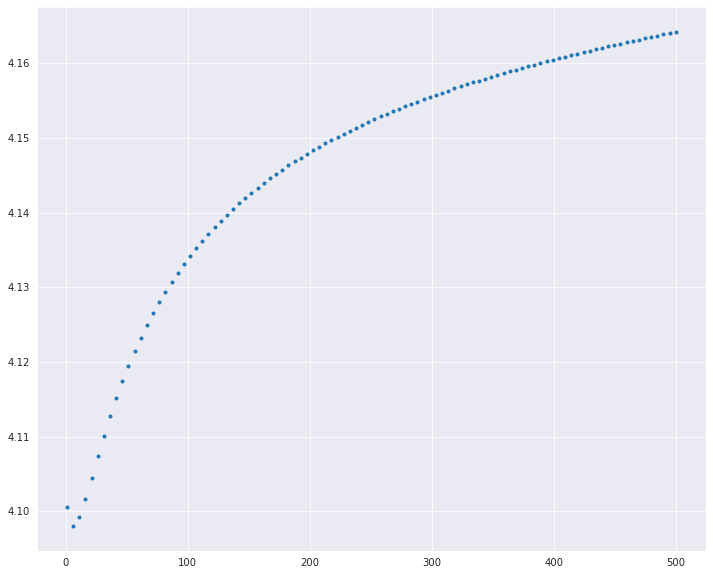

Optimal alpha      fun: 4.098010219388514
 message: 'Solution found.'
    nfev: 17
     nit: 17
  status: 0
 success: True
       x: 6.149003285265269


Validační RMSE: 4.09801


In [60]:
def get_opt_ridge_model(Xtrain, Xval):
    def ridgemodel_eval(alpha):
        clf = Ridge(alpha=alpha)
        clf.fit(Xtrain, ytrain)
        return metrics.mean_squared_error(yval, clf.predict(Xval), squared = False)

    alphas = np.linspace(1,500,100)
    alphas_res = [ridgemodel_eval(alpha) for alpha in alphas]
    plt.figure(figsize=(12, 10))
    plt.plot(alphas, alphas_res, '.')
    plt.show()

    # get optimal alpha
    opt_alpha = optimize.minimize_scalar(ridgemodel_eval, options = {'maxiter': 30}, method = 'bounded', bounds=(0.1, 400))
    print('Optimal alpha', opt_alpha)
    print("\n")

    clf_opt_ridge = Ridge(alpha = opt_alpha.x)
    clf_opt_ridge.fit(Xtrain, ytrain)
    return clf_opt_ridge

clf_opt_ridge = get_opt_ridge_model(Xtrain, Xval)
RMSE_val_opt_ridge = metrics.mean_squared_error(yval, clf_opt_ridge.predict(Xval), squared = False)
RMSE_dict['Ridge RMSE'] = RMSE_val_opt_ridge
print(f'Validační RMSE: {RMSE_val_opt_ridge:.5f}')

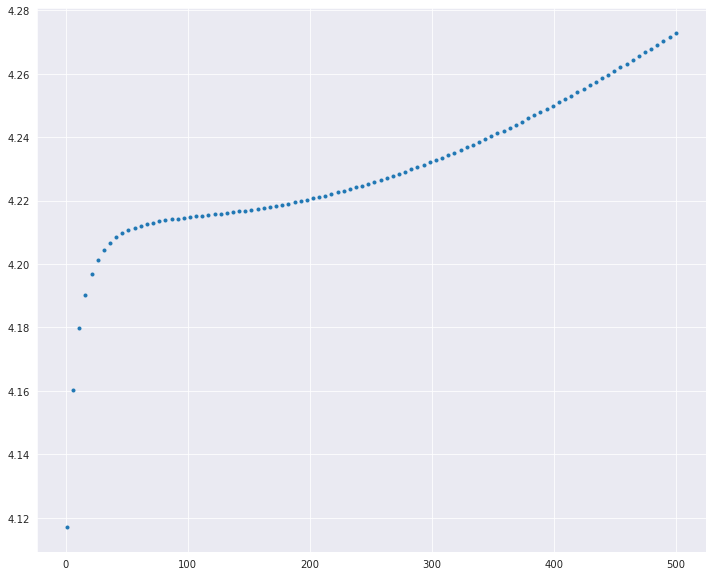

Optimal alpha      fun: 4.103685427216975
 message: 'Maximum number of function calls reached.'
    nfev: 30
     nit: 30
  status: 1
 success: False
       x: 0.10019571355463124


Validační RMSE (Standardizace): 4.10369


In [61]:
clf_opt_ridge = get_opt_ridge_model(Xtrain_standard_scaled, Xval_standard_scaled)
RMSE_val_opt_ridge = metrics.mean_squared_error(yval, clf_opt_ridge.predict(Xval_standard_scaled), squared = False)
print(f'Validační RMSE (Standardizace): {RMSE_val_opt_ridge:.5f}')

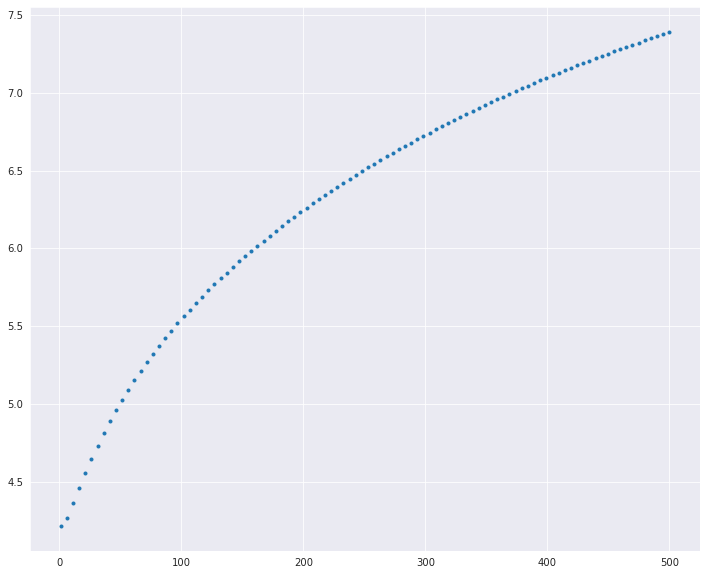

Optimal alpha      fun: 4.218413232339128
 message: 'Solution found.'
    nfev: 20
     nit: 20
  status: 0
 success: True
       x: 1.0258471905379578


Validační RMSE (MinMax normalizace): 4.21841


In [62]:
clf_opt_ridge = get_opt_ridge_model(Xtrain_MinMax_scaled, Xval_MinMax_scaled)
RMSE_val_opt_ridge = metrics.mean_squared_error(yval, clf_opt_ridge.predict(Xval_MinMax_scaled), squared = False)
print(f'Validační RMSE (MinMax normalizace): {RMSE_val_opt_ridge:.5f}')

Vidíme, že Ridge regrese vykazuje přibližně dvakrát horší výsledek než Random Forest. Je to s největší pravděpodobností proto, že náš dataset obsahuje nepěkná data, nejjasnějším příkladem je atribut, který ukazuje populaci dané země v tomto roce. Tento atribut neadekvátně skáče (s rozdílem jednoho roku se zvyšuje nebo snižuje 100krát). Takové jevy lze pozorovat i v jiných atributech. V tomto ohledu vznikají **nelinearity v datech**, které Ridge regrese nemůže efektivně modelovat. Můžeme tedy konstatovat, že použití tohoto modelu bude v našem případě méně efektivní.

## AdaBoost
* Výhody tohoto modelu
    * Schopnost zachytit nelinearity: AdaBoost může být efektivní při zachycování nelinearit v datech
    * Ochrana před přetrénováním: AdaBoost je obecně schopen dobře se vypořádat s přetrénováním díky technice váženého učení 

* Stejně jako u Random Forest použijeme za podmodel rozhodovací strom
* Budeme ladit skoro stejné hyperparametry jako u Random Forest (kromě hyperparametru `max_samples`)
* Pak každou kombinaci vyzkoušíme na validační množině, abychom našli tu "nejlepší"
* Použijeme nejlepší kombinaci hyperparametrů, nacvičíme model a najdeme RMSE na validační množině

We found the best params {'normalization': 'MinMax', 'n_estimators': 90, 'max_features': None, 'max_depth': 7} with validation RMSE 2.07477.


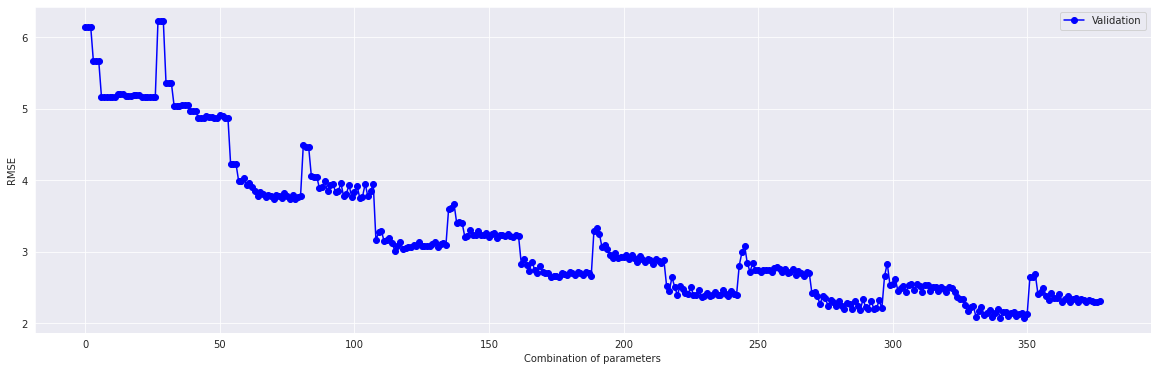

In [63]:
# Hyperparametry
param_grid = {
    'n_estimators' : range(10, 100, 10),
    'max_depth' : range(1, 8),
    'max_features' : [None, "sqrt"],
    'normalization' : [None, 'MinMax', 'Standard']
}

Xtrain = np.array(Xtrain, "float64")
Xval = np.array(Xval, "float64")
ytrain = np.array(ytrain, "float64")
yval = np.array(yval, "float64")

# Kombinace hyperparametrů
param_comb = ParameterGrid(param_grid)

# Ladění
val_metric = []
for params in param_comb:
    estimator = DecisionTreeRegressor(max_depth=params["max_depth"], max_features=params["max_features"])
    if params['normalization'] is None:
        dt = AdaBoostRegressor(estimator=estimator, n_estimators=params["n_estimators"], random_state = 42).fit(Xtrain, ytrain)
        val_metric.append(metrics.mean_squared_error(yval, dt.predict(Xval), squared = False))
    elif params['normalization'] == 'MinMax':
        dt = AdaBoostRegressor(estimator=estimator, n_estimators=params["n_estimators"], random_state = 42).fit(Xtrain_MinMax_scaled, ytrain)
        val_metric.append(metrics.mean_squared_error(yval, dt.predict(Xval_MinMax_scaled), squared = False))
    else:
        dt = AdaBoostRegressor(estimator=estimator, n_estimators=params["n_estimators"], random_state = 42).fit(Xtrain_standard_scaled, ytrain)
        val_metric.append(metrics.mean_squared_error(yval, dt.predict(Xval_standard_scaled), squared = False))

# Vizualizace výsledků
best_params = param_comb[np.argmin(val_metric)]
RMSE_dict['AdaBoost RMSE'] = min(val_metric)
print(f"We found the best params {best_params} with validation RMSE {min(val_metric):.06}.")
plt.figure(figsize=(20,6))
plt.plot(val_metric,'ob-')
plt.xlabel('Combination of parameters')
plt.ylabel('RMSE')
plt.legend(['Validation'])

* AdaBoost dosáhl hodnoty Root Mean Square Error (RMSE) 2.075, což je nižší než hodnota RMSE pro Random Forest (2.210)
* Nižší hodnota RMSE naznačuje menší chybu predikce, což znamená, že model AdaBoost lépe odpovídá skutečným hodnotám délky dožití na validační množině
* AdaBoost je efektivnější v oblasti generalizace na nová data

## Výběr finálního model

In [67]:
for item in RMSE_dict.items():
    print(item[0], ':', item[1].round(5))

Random Forest RMSE : 2.20971
Ridge RMSE : 4.09801
AdaBoost RMSE : 2.07477


* Výběr finálního modelu je také volbou hyperparametru, takže jej bude správně vybírat na základě výsledků RMSE na validační množině
* Podle výsledků testování favoritem je AdaBoost

In [65]:
estimator = DecisionTreeRegressor(max_depth=best_params["max_depth"], max_features=best_params["max_features"])
adaboost = AdaBoostRegressor(estimator=estimator, n_estimators=best_params["n_estimators"], random_state = 42).fit(Xtrain_MinMax_scaled, ytrain)

predictions = adaboost.predict(Xtest_MinMax_scaled)
RMSE = metrics.mean_squared_error(ytest, predictions, squared=False)
MAE = metrics.mean_absolute_error(ytest, predictions)
print(f'RMSE (test): {RMSE}')
print(f'MAE  (test): {MAE}')

RMSE (test): 1.9456325015311602
MAE  (test): 1.4061679209763185


1. RMSE na testovací množině (1.9456): 
    * Hodnota Root Mean Square Error (RMSE) 1.9456 na testovací množině ukazuje, jak dobře se model AdaBoost přizpůsobil novým datům. Nižší hodnota RMSE znamená menší chybu predikce a naznačuje, že model má schopnost přesně predikovat délku dožití na neviděných datech.

2. MAE na testovací množině (1.4062): 
    * Mean Absolute Error (MAE) je další metrikou hodnotící přesnost modelu na testovací množině. Nižší hodnota MAE značí menší průměrnou absolutní odchylku mezi predikcemi a skutečnými hodnotami, což opět indikuje dobrý výkon modelu.

* A konečně nacvičíme náš finální model na celém datasetu a uděláme pridikci dat z `evaluation.csv`
* Výsledky uložíme do results.csv

In [66]:
scale = MinMaxScaler()
Xdata_scaled = scale.fit_transform(Xdata)
evaluation_scaled = scale.transform(evaluation)

estimator = DecisionTreeRegressor(max_depth=best_params["max_depth"], max_features=best_params["max_features"])
finale_model = AdaBoostRegressor(estimator=estimator, n_estimators=best_params["n_estimators"], random_state = 42).fit(Xdata_scaled, ydata)

predict = finale_model.predict(evaluation_scaled).round(1)

results = pd.DataFrame({'Country' : evaluation_country, 'Year' : evaluation_year, 'Life expectancy' : predict})
results.to_csv('results.csv', index=False)